In [58]:
import csv
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import numpy as np
import os
from PIL import Image

plt.rcParams.update({
    #"font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 5,
})

# individual gifs

In [59]:
# getting the images
def basis_paths(sides, basis):
    return [f"./data/{sides}sides/{basis}_basis/{basis}{i}.png" for i in range(36)]


def err_paths(sides, err_type):
    return [f"./data/{sides}sides/err_{err_type}/{err_type}_{i}.png" for i in range(36)]


def get_imgs(sides):
    kpaths = basis_paths(sides, "k")
    zpaths = basis_paths(sides, "z")

    l2paths = err_paths(sides, "l2")
    linfpaths = err_paths(sides, "linf")

    kimgs = [Image.open(path) for path in kpaths]
    zimgs = [Image.open(path) for path in zpaths]

    l2imgs = [Image.open(path) for path in l2paths]
    linfimgs = [Image.open(path) for path in linfpaths]

    return kimgs, zimgs, l2imgs, linfimgs


def save_gif(imgs, sides, name):
    # color params
    color = ''
    if name == "K":
        color = 'b'
    if name == "Z":
        color == 'r'
    
    plt.rcParams.update({
            "font.serif": ["Computer Modern Roman"],
            "font.size": 9,
        })
    
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(imgs[0], animated=True)
    
    if color:
        ax.set_title(f"{name} Basis, n = {0}", y=0.9, color=color)
    
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
    
    
    def update(order):
        im.set_array(imgs[order])
        ax.set_title(f"K Basis, n = {order}", y=0.9, color='b')
        return im,
    
    
    animation_fig = animation.FuncAnimation(
        fig,
        update,
        frames=len(imgs),
        interval=200,
        blit=True,
        repeat_delay=2000,
    )

    savepath = f"gifs/{sides}sides_{name.lower()}.gif"
    animation_fig.save(savepath, dpi=600)
    print(f"Finished saving {savepath}")
    plt.close()
    return


def make_gifs(sides):
    print("----- Making Gifs -----")
    imgs_list = get_imgs(sides)
    names = ["K", "Z", "L2", "Linf"]

    for imgs, name in zip(imgs_list, names):
        print(f"Starting {sides} sides {name} gif")
        save_gif(imgs, sides, name)

    print("----- Completed Making Gifs -----")
    return

# make sure to NOT use make_gifs
# your laptop does not have enough ram to make them all at once ;-;
# stack more paper lil bro

In [62]:
# make each Linf
sides_list = [3, 5, 8, 20]

# make each L2
for sides in sides_list:
    imgs_list = get_imgs(sides)

    print(f"Starting {sides} sides")
    save_gif(imgs_list[3], sides, "Linf")

Starting 3 sides


MovieWriter ffmpeg unavailable; using Pillow instead.


Finished saving gifs/3sides_linf.gif
Starting 5 sides


MovieWriter ffmpeg unavailable; using Pillow instead.


Finished saving gifs/5sides_linf.gif
Starting 8 sides


MovieWriter ffmpeg unavailable; using Pillow instead.


Finished saving gifs/8sides_linf.gif
Starting 20 sides


MovieWriter ffmpeg unavailable; using Pillow instead.


Finished saving gifs/20sides_linf.gif


# cool zernike polynomials

# cool zernike polynomials on polygons

# error plots

kerr, zerr = read_errs(20, "l2")

for i in [1, 36]:
    order = i - 1

    if order == 0:
        plt.xticks(ticks=0.02 * np.arange(-2, 3), labels=['', '', '0', '', ''])
        plt.yscale("log")

    if order != 0:
        plt.semilogy(kerr[:i], color="b")
        plt.semilogy(zerr[:i], color="r")

    if order < 7:
        plt.ylim(kerr[order], 1.1)
        plt.yticks(ticks=[10**0, 10**-1])
    
    if order < 10:
        orders = np.arange(0, i)
        plt.xticks(ticks=orders)
    
    plt.ylabel("log of Relative (L$^2$) Error")
    plt.xlabel("Zernike Radial Order")
    
    plt.grid(True, which="both")

    plt.scatter(order, kerr[order], label="K Basis", color="b")
    plt.scatter(order, zerr[order], label="Z Basis", color="r")
    plt.legend(loc=3)

    plt.show()

In [56]:
def read_errs(sides, err_type):
    err_files = [f"data/{sides}sides/{err_type}{basis}.txt" for basis in ["k", "z"]]

    kerr = []
    zerr = []

    for i, err in enumerate([kerr, zerr]):
        with open(err_files[i], "r") as file:
            for row in csv.reader(file):
                err.append(float(row[0]))

    return kerr, zerr


def check_dir(sides, err_type):
    save_dir = f"data/{sides}sides/err_{err_type}/"
    if not os.path.isdir(save_dir):
        os.mkdir(save_dir)
    return save_dir


def save_err_plots(sides, err_type):
    kerr, zerr = read_errs(sides, err_type)
    
    for i in range(1, 37):
        order = i - 1
    
        if order == 0:
            plt.xticks(ticks=0.02 * np.arange(-2, 3), labels=['', '', '0', '', ''])
            plt.yscale("log")
    
        if order != 0:
            plt.semilogy(kerr[:i], color="b")
            plt.semilogy(zerr[:i], color="r")

        if order < 7:
            plt.ylim(kerr[order], 1.1)
            plt.yticks(ticks=[10**0, 10**-1])
        
        if order < 10:
            orders = np.arange(0, i)
            plt.xticks(ticks=orders)
        
        plt.ylabel("log of Relative (L$^2$) Error")
        plt.xlabel("Zernike Radial Order")
        
        plt.grid(True, which="both")

        plt.scatter(order, kerr[order], label="K Basis", color="b")
        plt.scatter(order, zerr[order], label="Z Basis", color="r")
        plt.legend(loc=3)

        save_path = f"data/{sides}sides/err_{err_type}/{err_type}_{order}.png"
        plt.savefig(save_path, dpi=600)
        plt.close()
    return


def err_plots(sides, err_type):
    plt.rcParams.update({
        "font.serif": ["Computer Modern Roman"],
        "font.size": 10,
    })

    save_dir = check_dir(sides, err_type)
    print(f"Saving to {save_dir}")

    save_err_plots(sides, err_type)

    print(f"Saved {sides} sides, {err_type} error")
    return

In [57]:
def save_all_errs():
    for err_type in ["l2", "linf"]:
        for sides in [3, 5, 8, 20]:
            err_plots(sides, err_type)

save_all_errs()

Saving to data/3sides/err_l2/
Saved 3 sides, l2 error
Saving to data/5sides/err_l2/
Saved 5 sides, l2 error
Saving to data/8sides/err_l2/
Saved 8 sides, l2 error
Saving to data/20sides/err_l2/
Saved 20 sides, l2 error
Saving to data/3sides/err_linf/
Saved 3 sides, linf error
Saving to data/5sides/err_linf/
Saved 5 sides, linf error
Saving to data/8sides/err_linf/
Saved 8 sides, linf error
Saving to data/20sides/err_linf/
Saved 20 sides, linf error


# plotting R$_\alpha$

In [ ]:
num_sides = 4
r0 = 1
alpha = np.pi / num_sides

def r_alpha(theta):
    sector = np.array((theta + alpha) / (2 * alpha), dtype=int)
    u_alpha = (theta - sector * 2 * alpha)
    return r0 * np.cos(alpha) / np.cos(u_alpha)

thetas = np.linspace(-alpha, 2 * np.pi - alpha, 1000)
rs = r_alpha(thetas)


# plotting
# gloop =  4 * 1.5
plt.figure(figsize=(7.5, 3))
plt.plot(thetas, rs, label=r"$R_{\alpha}$", c='r')
plt.xticks(
    ticks=np.pi * np.array([-1/4, 0, 1/4, 1/2, 1, 3/2, 7/4]),
    labels=[r"-$\pi$/4", r"0", r"$\pi$/4", r"$\pi$/2", r"$\pi$", r"3$\pi$/2", r"7$\pi$/4"]
)

# filling
glip = np.linspace(-alpha, alpha, 250)
glop = r_alpha(glip)

plt.fill_between(
    x=glip,
    y1=0,
    y2=glop,
    color='green',
    alpha=0.65,
    label="First Sector"
)

plt.ylim(0, 1.1)
#plt.xlim(-alpha - 0.2, 1.5 * alpha)
plt.grid(which="both")
plt.legend()

plt.xlabel(r"Polar Angle, $\theta$")
plt.ylabel(r"Outer Radius, $R_\alpha$")

plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('presentations/square-ralpha.png', dpi=600)
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

# trying to make all gifs together

In [3]:
# getting the images
def basis_paths(sides, basis):
    return [f"./data/{sides}sides/{basis}_basis/{basis}{i}.png" for i in range(36)]


def err_paths(sides, err_type):
    return [f"./data/{sides}sides/err_{err_type}/{err_type}_{i}.png" for i in range(36)]


def imgs(sides):
    kpaths = basis_paths(sides, "k")
    zpaths = basis_paths(sides, "z")

    l2paths = err_paths(sides, "l2")
    linfpaths = err_paths(sides, "linf")

    kimgs = [Image.open(path) for path in kpaths]
    zimgs = [Image.open(path) for path in zpaths]

    l2imgs = [Image.open(path) for path in l2paths]
    linfimgs = [Image.open(path) for path in linfpaths]

    return kimgs, zimgs, l2imgs, linfimgs


sides = 3
kimgs, zimgs, l2imgs, linfimgs = imgs(sides)

NameError: name 'kimgs' is not defined

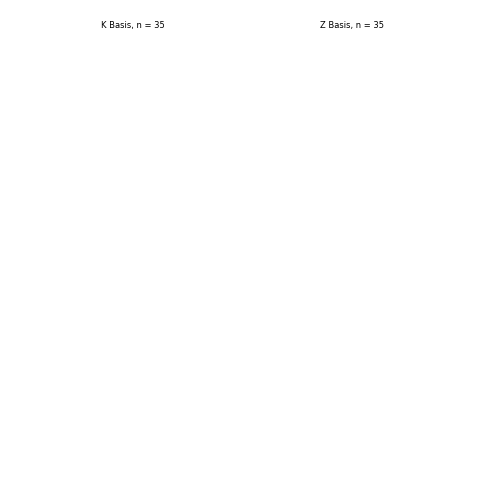

In [2]:
plt.rcParams.update({
        "font.serif": ["Computer Modern Roman"],
        "font.size": 5,
    })

# making the plots
fig, ax = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(6,6),
)

plt.subplots_adjust(
#    left=0.125,
#    right=0.9,
#    bottom=.5,
#    top=0.9,
    wspace=-0.105,
    hspace=-0.225
)

#"""
for row in [0, 1]:
    for col in [0, 1]:
        ax[row,col].xaxis.set_visible(False)
        ax[row,col].yaxis.set_visible(False)
        ax[row,col].spines[['top', 'bottom', 'right', 'left']].set_visible(False)
#"""

order = 35

ax[0,0].set_title(f"K Basis, n = {order}", y=0.9)
ax[0,1].set_title(f"Z Basis, n = {order}", y=0.9)

imk = ax[0,0].imshow(kimgs[order], animated=True)
imz = ax[0,1].imshow(zimgs[order], animated=True)
#iml2 = ax[1,1].imshow(l2imgs[order], animated=True, colspan=2)
#iml2 = ax[1,1].imshow(linfimgs[order], animated=True)

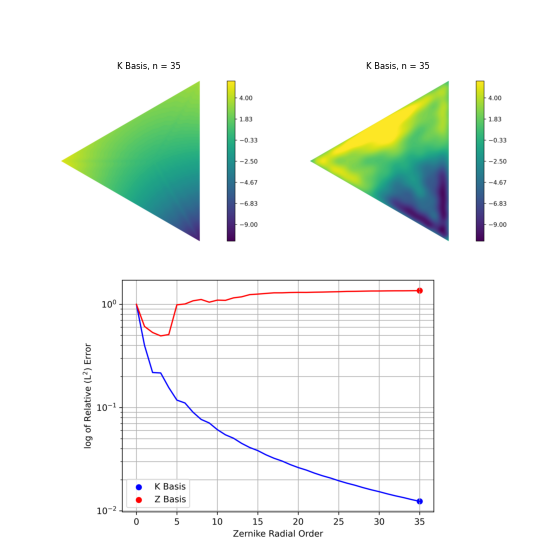

In [4]:
plt.rcParams.update({
    "font.serif": ["Computer Modern Roman"],
    "font.size": 5,
})

# making the plots
fig = plt.figure(figsize=(10,10))

axk = plt.subplot2grid((3, 3), (0, 0))
axz = plt.subplot2grid((3, 3), (0, 1))
axe = plt.subplot2grid((3, 3), (1, 0), colspan=2)

plt.subplots_adjust(
#    left=0.125,
#    right=0.9,
#    bottom=.5,
#    top=0.9,
    wspace=-0.1,
    hspace=-0.22,
)

for ax in [axk, axz, axe]:
    ax.axis("equal")
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)

order = 35
height = 0.775
axk.set_title(f"K Basis, n = {order}", y=height)
axz.set_title(f"K Basis, n = {order}", y=height)

imk = axk.imshow(kimgs[order], animated=True)
imz = axz.imshow(zimgs[order], animated=True)
ime = axe.imshow(l2imgs[order], animated=True)

plt.show()

In [ ]:
# update function
def update(order):
    imk.set_array(kimgs[order])
    imz.set_array(zimgs[order])
    ime.set_array(l2imgs[order])
    
    axk.set_title(f"K Basis, n = {order}")
    axz.set_title(f"Z Basis, n = {order}")
    return imk, imz, ime


# creating the gif
animation_fig = animation.FuncAnimation(
    fig,
    update,
    frames=len(kimgs),
    interval=200,
    blit=True,
    repeat_delay=10,
)

sides = 3
animation_fig.save(
    f"{sides}sides.gif",
    dpi=600,
)

MovieWriter ffmpeg unavailable; using Pillow instead.
